In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

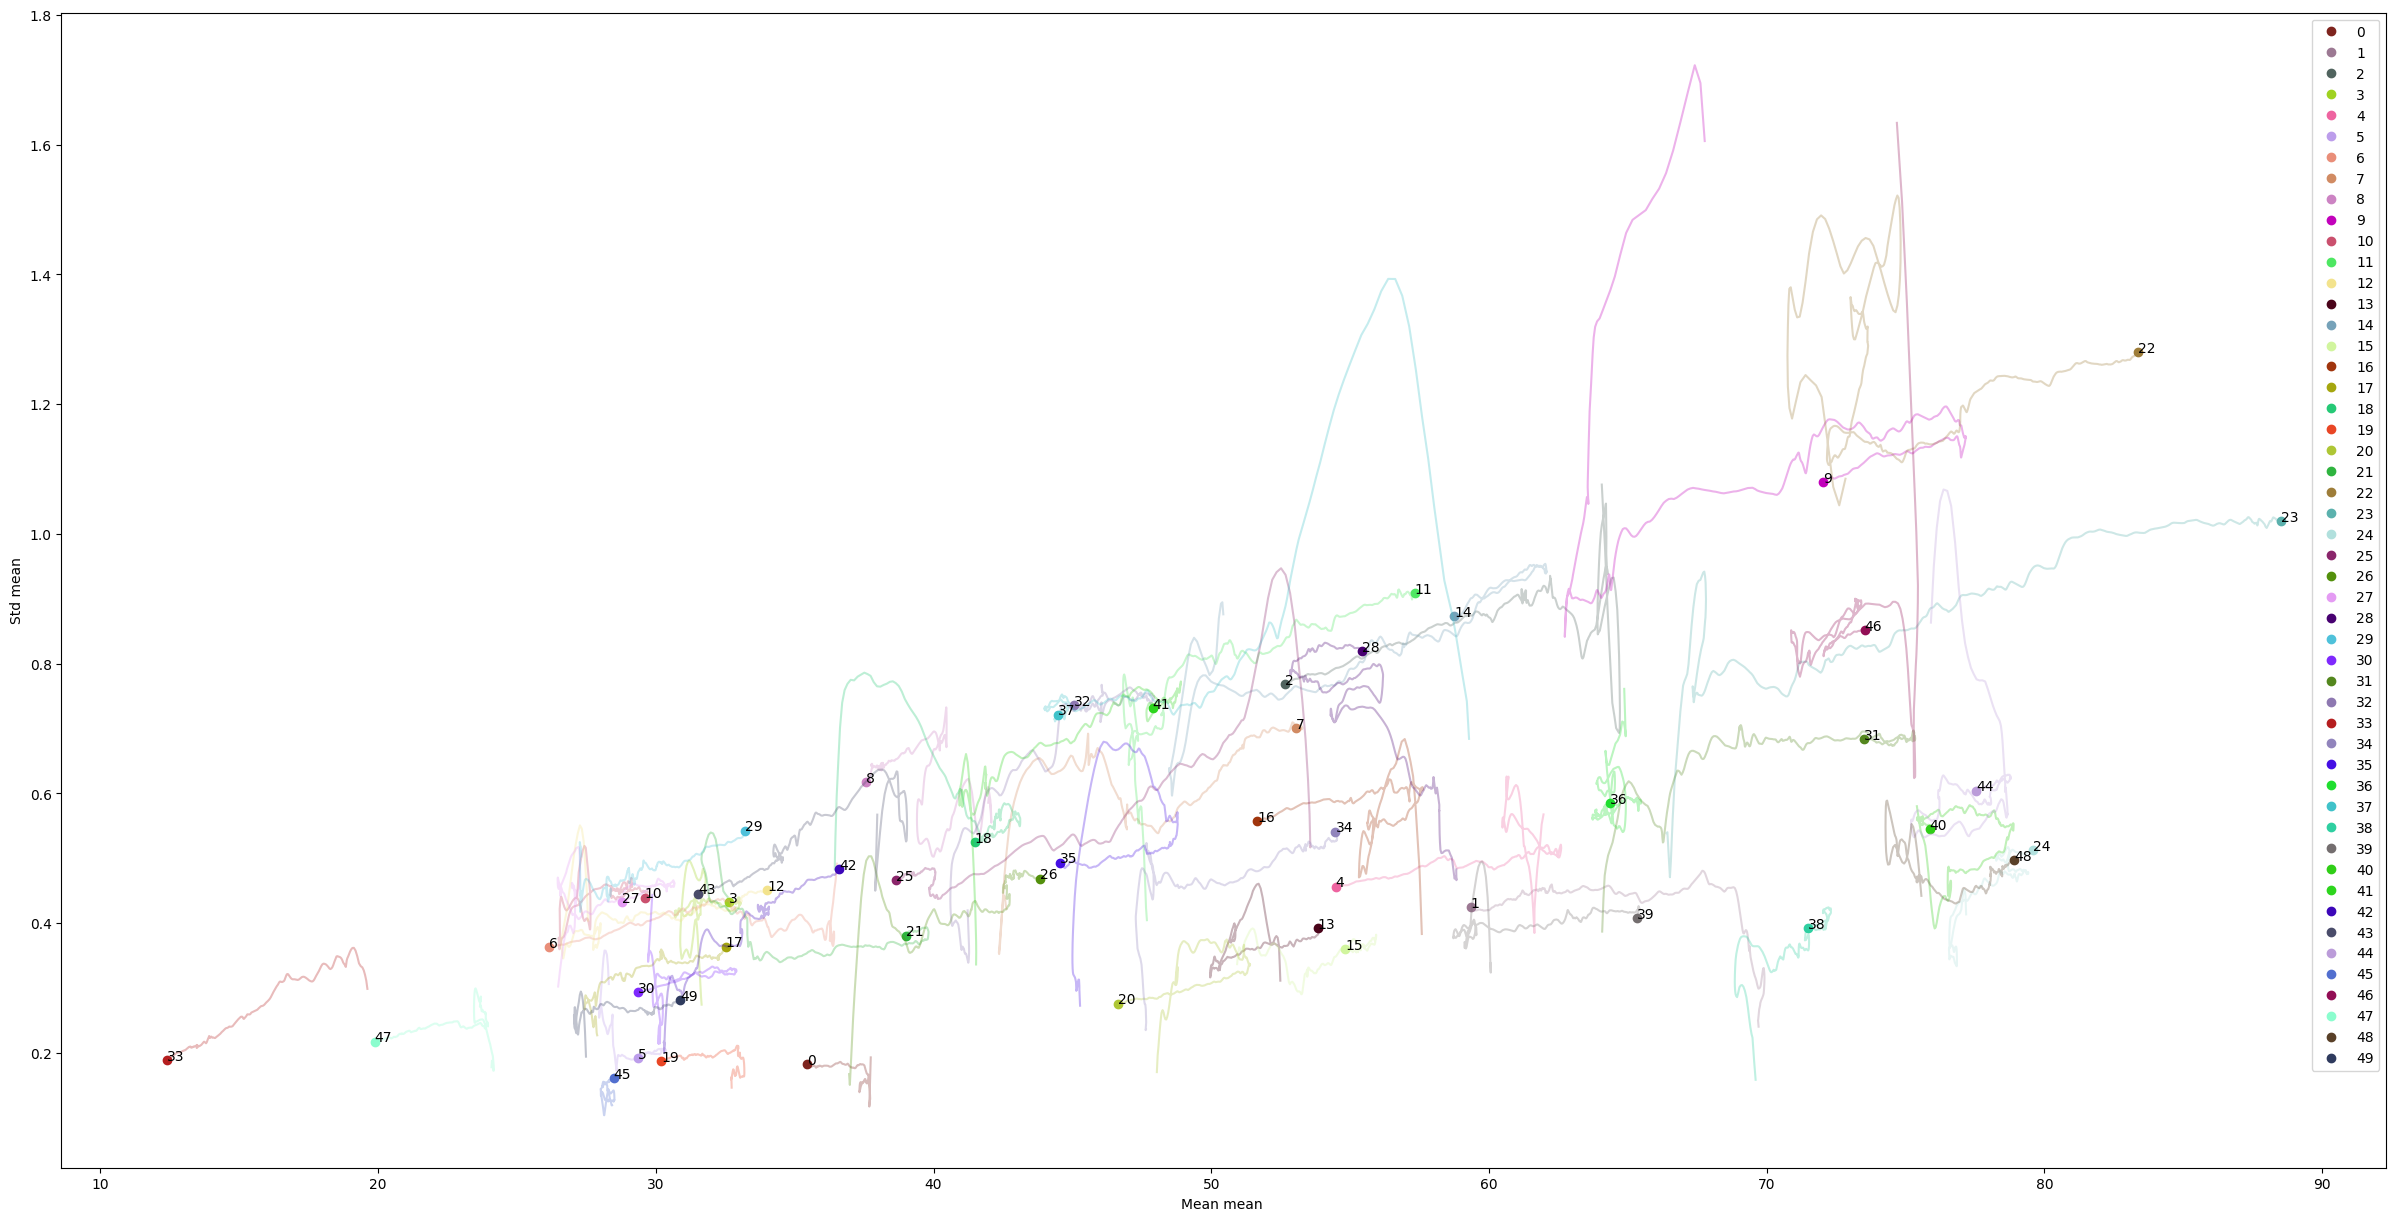

In [262]:
kern_length = 10
kernel = np.ones(kern_length)

Tl = T-kern_length+1
KernPad = kern_length//2
# Rolling mean
rolling_mean = np.zeros((nInst,Tl))
for i in range(nInst):
    conv = np.convolve(prices[i,:], kernel, mode='valid')  # or 'same', 'full'
    rolling_mean[i,:] = conv /kern_length

# Rolling std
rolling_std = np.zeros((nInst,Tl))
for i in range(nInst):
    for j in range(Tl):
        window = prices[i,j:j+kern_length]
        rolling_std[i,j] = window.std()

# Rolling Z score
rolling_z = np.zeros(( nInst,Tl ))
for i in range(nInst):
    x = prices[i,KernPad:-KernPad+1]
    diff = x-rolling_mean[i,:]
    z = diff/rolling_std[i,:]
    rolling_z[i,:] = z
    
meanmean = np.zeros((nInst,Tl))
meanstd = np.zeros((nInst,Tl))

for i in range(nInst):
    for t in range(2,Tl):
        meanmean[i,t]=rolling_mean[i,:t].mean()
        meanstd[i,t]=rolling_std[i,:t].mean()

colors = np.random.rand(nInst, 3)
f,ax = plt.subplots(figsize=(30,15))
ax.set_xlabel("Mean mean ")
ax.set_ylabel("Std mean")
tt = Tl
for i in range(50):
    ax.plot(meanmean[i,2:tt], meanstd[i,2:tt],alpha=0.3,color=colors[i])
    lastMean = meanmean[i,:tt][-1]
    lastStd = meanstd[i,:tt][-1]
    ax.plot(lastMean,lastStd,"o",label=str(i),color=colors[i])
    ax.text(lastMean,lastStd,str(i))
plt.legend()
plt.show()
